In [1]:
import numpy as np
import matplotlib.pylab as plt
import uproot
import awkward as ak
import seaborn
import RA_funcs as rf
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from scipy.special import gamma
from scipy.stats import skew

imports work


In [2]:
hit_data_1093 = rf.get_ROOT_data_zip_RECO(1093)
# hit_data_1088 = rf.get_ROOT_data_zip_RECO(1088)
hit_data_scope_1093 = rf.DUT_TELE_merge(1093)

1093 RECONSTRUCTED finished


In [21]:

hit_data_scope_1081 = rf.DUT_TELE_merge(1081)

In [146]:
hit_data_1081 = rf.get_ROOT_data_zip_RECO(1081)


1081 RECONSTRUCTED finished


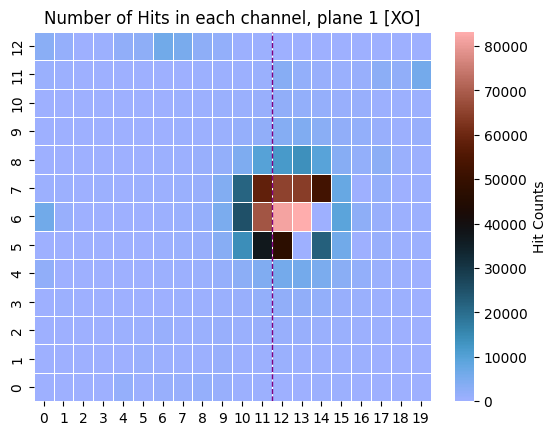

In [227]:
rf.hits_amount_colormap_single_plane(hit_data_1081,1)

In [93]:
run_1093_plane_4 = hit_data_1093[hit_data_1093.plane == 4]
run_1093_plane_4_ch_105 = run_1093_plane_4[run_1093_plane_4.ch == 105]
run_1093_plane_4_ch_105_origin = ak.where(ak.num(run_1093_plane_4_ch_105.amp) == 0, [[0]], run_1093_plane_4_ch_105.amp)
run_1093_plane_4_ch_105_clean = run_1093_plane_4_ch_105[ak.num(run_1093_plane_4_ch_105)>0]

C:\Users\bents\AppData\Local\Temp\ipykernel_23244\3870518902.py:2: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  data = np.array(run_1093_plane_4_ch_105_origin)


0


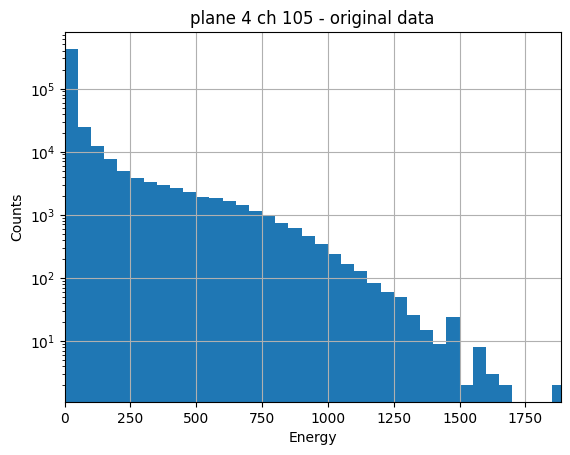

In [114]:
# origina data on plane 4 ch 105
data = np.array(run_1093_plane_4_ch_105_origin)
print(data.min())
# Define bin width
bin_width = 50
# Create bins from min to max with step of 5
bins = np.arange(data.min(), data.max() + bin_width, bin_width)
# Plot histogram
plt.figure()
plt.hist(data, bins=bins)
plt.grid(True)
plt.xlim(0, data.max())
# Labels
plt.xlabel("Energy")
plt.ylabel("Counts")
plt.title("plane 4 ch 105 - original data")
plt.yscale("log")
plt.show()

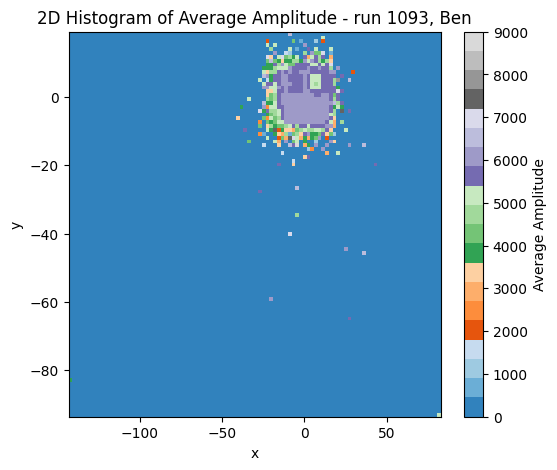

In [147]:
X_ben1 = ak.flatten(hit_data_scope_1093.tele.x)
Y_ben1 = ak.flatten(hit_data_scope_1093.tele.y)

X_ben = -ak.to_numpy(X_ben1)
Y_ben = ak.to_numpy(Y_ben1)

amp_ben1 = ak.sum(hit_data_scope_1093.hits.amp, axis = 1)
amp_ben = ak.to_numpy(amp_ben1)

# Define bins
bins = 100

# Histogram of SUM of amplitudes
sum_amp, xedges, yedges = np.histogram2d(X_ben, Y_ben, bins=bins, weights=amp_ben)

# Histogram of COUNTS
counts, _, _ = np.histogram2d(X_ben, Y_ben, bins=[xedges, yedges])

# Avoid division by zero
avg_amp = np.divide(sum_amp, counts, out=np.zeros_like(sum_amp), where=counts > 0)

# Plot
plt.figure(figsize=(6,5))
plt.pcolormesh(xedges, yedges, avg_amp.T, cmap="tab20c")  
plt.colorbar(label="Average Amplitude")
plt.xlim(min(X_ben), max(X_ben))
# plt.xlim(-30, 30)
plt.ylim(min(Y_ben), max(Y_ben))
# plt.ylim(-30, 20)
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Histogram of Average Amplitude - run 1093, Ben")
plt.show()


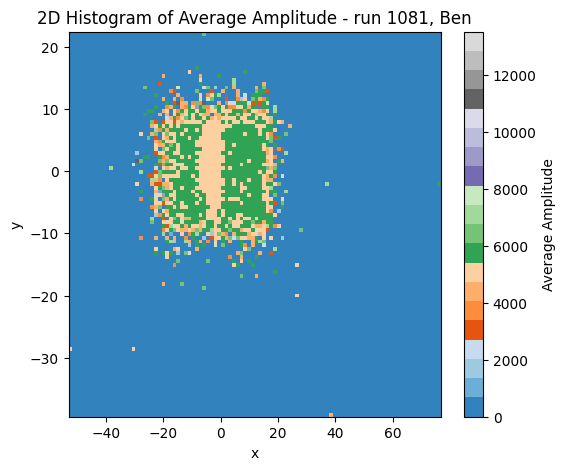

In [22]:
hit_data_scope_1081_filtered = filter_chi2_scope_data(hit_data_scope_1081, 3)
X_ben1 = ak.flatten(hit_data_scope_1081.tele.x)
Y_ben1 = ak.flatten(hit_data_scope_1081.tele.y)

X_ben = -ak.to_numpy(X_ben1)
Y_ben = ak.to_numpy(Y_ben1)

amp_ben1 = ak.sum(hit_data_scope_1081.hits.amp, axis = 1)
amp_ben = ak.to_numpy(amp_ben1)

# Define bins
bins = 100

# Histogram of SUM of amplitudes
sum_amp, xedges, yedges = np.histogram2d(X_ben, Y_ben, bins=bins, weights=amp_ben)

# Histogram of COUNTS
counts, _, _ = np.histogram2d(X_ben, Y_ben, bins=[xedges, yedges])

# Avoid division by zero
avg_amp = np.divide(sum_amp, counts, out=np.zeros_like(sum_amp), where=counts > 0)

# Plot
plt.figure(figsize=(6,5))
plt.pcolormesh(xedges, yedges, avg_amp.T, cmap="tab20c")  
plt.colorbar(label="Average Amplitude")
plt.xlim(min(X_ben), max(X_ben))
# plt.xlim(-30, 30)
plt.ylim(min(Y_ben), max(Y_ben))
# plt.ylim(-30, 20)
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Histogram of Average Amplitude - run 1081, Ben")
plt.show()


[4785, 4579, 4821, 6242, 1328, 13232, ..., 4536, 5073, 4118, 11014, 2598, 4525]
Gaussian fit parameters:
c     = 5501.938
m     = -3.099
theta     = -1.259 Radians
A     = 715.349
mu    = -2.348
sigma = 1.211


C:\Users\bents\AppData\Local\Programs\Python\Python313\Lib\site-packages\awkward\_nplikes\array_module.py:292: RuntimeWarning: invalid value encountered in divide
  return impl(*broadcasted_args, **(kwargs or {}))


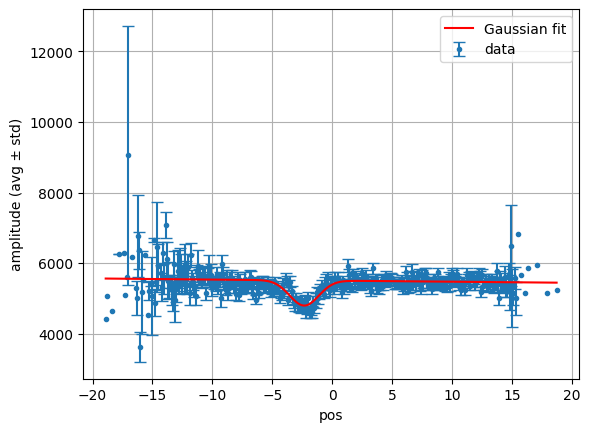

In [32]:
hit_data_scope_1081 = rf.filter_chi2_scope_data(hit_data_scope_1081, 0.05)
y_max, y_min = 10, -10

data = hit_data_scope_1081[ak.flatten((hit_data_scope_1081.tele.y < y_max) & (hit_data_scope_1081.tele.y > y_min))]
a = data
data = data[ak.num(data.tele) > 0]


# compute X and E
X = -ak.to_numpy(ak.mean(data.tele.x, axis=1))
X = np.round(X,1)
E = ak.sum(data.hits.amp, axis=1)
print(E)

# grouping
amp, mean, pos = rf.ak_groupby(X, E, round="false")
amp_avg = ak.mean(amp.data, axis=1)
amp_std = ak.std(amp.data, axis=1) / np.sqrt(ak.num(amp.data, axis=1) - 1)

# mask
mask = (pos > -20) & (pos < 20)
# mask = (pos > min(X)) & (pos < max(X))

# convert Awkward → Numpy
pos_m = ak.to_numpy(pos[mask])
amp_m = ak.to_numpy(amp_avg[mask])
err_m = ak.to_numpy(amp_std[mask])

# --- Gaussian model ---
def gaussian_linear(x, c, m, A, mu, sigma):
    return c + m*x - A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# initial guesses
c0 = 6000
m0 = 0
A0 = np.min(amp_m)
# A0 = np.max(amp_m)
# mu0 = pos_m[np.argmin(amp_m)]
mu0 = 0
sigma0 = 3
# sigma0 = (np.max(pos_m) - np.min(pos_m)) / 6

# fit
popt, pcov = curve_fit(gaussian_linear, pos_m, amp_m, p0=[c0, m0, A0, mu0, sigma0])

c_fit, m_fit, A_fit, mu_fit, sigma_fit = popt

print("Gaussian fit parameters:")
print(f"c     = {c_fit:.3f}")
print(f"m     = {m_fit:.3f}")
print(f"theta     = {np.arctan(m_fit):.3f} Radians")
print(f"A     = {A_fit:.3f}")
print(f"mu    = {mu_fit:.3f}")
print(f"sigma = {sigma_fit:.3f}")

# make smooth curve for plotting
x_fit = np.linspace(np.min(pos_m), np.max(pos_m), 500)
y_fit = gaussian_linear(x_fit, *popt)

# --- plotting ---
plt.errorbar(pos_m, amp_m, yerr=err_m, fmt='.', capsize=4, label="data")
plt.plot(x_fit, y_fit, 'r-', label="Gaussian fit", zorder=10)

plt.grid()
plt.xlabel("pos")
plt.ylabel("amplitude (avg ± std)")
plt.legend()
plt.show()


In [4]:


# def gal_scope_merge(run_number):
#     import gc
#     import pandas as pd
#     f = uproot.open(f"TB_FIRE/TB_reco/TB_FIRE_{run_number}_raw_reco.root")
#     tele = uproot.open(f"TB_FIRE/TB_reco/run_{run_number}_telescope.root")

#     arrs_events = f["Hits"].arrays(["TLU_number", "amplitude", "plane_ID", "ch_ID"], library="ak")
#     tele_events = tele["TrackingInfo/Tracks"].arrays(["triggerid", "x_dut", "y_dut"], library="ak")

#     arrs_events.TLU_number

#     df_dut = pd.DataFrame({
#         "TLU": ak.to_list(np.sort(arrs_events.TLU_number)),
#         "amplitude": ak.to_list(arrs_events.amplitude),
#         "plane_ID": ak.to_list(arrs_events.plane_ID),
#         "ch_ID": ak.to_list(arrs_events.ch_ID)
#     })

#     nonempty_mask = (ak.num(tele_events["x_dut"]) == 1) & (ak.num(tele_events["y_dut"]) == 1)
    
#     tele_trig_filtered = tele_events["triggerid"][nonempty_mask]
#     tele_x_filtered    = tele_events["x_dut"][nonempty_mask]
#     tele_y_filtered    = tele_events["y_dut"][nonempty_mask]

#     flat_triggers = ak.to_list(ak.flatten(tele_trig_filtered, axis=None))
#     flat_x       = ak.to_list(ak.flatten(tele_x_filtered, axis=None))
#     flat_y       = ak.to_list(ak.flatten(tele_y_filtered, axis=None))

#     df_tele = pd.DataFrame({
#         "triggerid": np.sort(flat_triggers),
#         "x_dut": flat_x,
#         "y_dut": flat_y
#     })
   
#     print("DataFrames constructed.")

#     df_tele = df_tele[df_tele["triggerid"].isin(df_dut["TLU"])]
#     df_dut = df_dut[df_dut["TLU"].isin(df_tele["triggerid"])]
    
#     # Group DUT hits by TLU
#     grouped_dut = df_dut.groupby("TLU", sort=False).agg({
#         "amplitude": lambda s: [item for sublist in s for item in (sublist if isinstance(sublist, list) else [sublist])],
#         "plane_ID": lambda s: [item for sublist in s for item in (sublist if isinstance(sublist, list) else [sublist])],
#         "ch_ID": lambda s: [item for sublist in s for item in (sublist if isinstance(sublist, list) else [sublist])]
#     }).reset_index()

#     # Group telescope hits by triggerid
#     grouped_tele = df_tele.groupby("triggerid", sort=False).agg({
#         "x_dut": lambda s: [item for sublist in s for item in (sublist if isinstance(sublist, list) else [sublist])],
#         "y_dut": lambda s: [item for sublist in s for item in (sublist if isinstance(sublist, list) else [sublist])]
#     }).reset_index().rename(columns={"triggerid": "TLU"})


#     print("DataFrames grouped by TLU/triggerid")
#     # Merge DUT and telescope on TLU
#     merged = pd.merge(grouped_dut, grouped_tele, on="TLU", how="left")

#     print("DataFrames merged")

#     del flat_triggers, flat_x, flat_y, df_dut, df_tele, grouped_dut, grouped_tele
#     gc.collect()

#     print("collected garbage")

#     events_awk = ak.zip({
#         "TLU": ak.Array(merged["TLU"].tolist()),
#         "Amplitudes": ak.Array(merged["amplitude"].tolist()),
#         "Planes": ak.Array(merged["plane_ID"].tolist()),
#         "Channels": ak.Array(merged["ch_ID"].tolist()),
#         "x_dut": ak.flatten(ak.Array(merged["x_dut"].tolist()),axis=1),
#         "y_dut": ak.flatten(ak.Array(merged["y_dut"].tolist()),axis=1)
#     })

#     return events_awk



DataFrames constructed.
DataFrames grouped by TLU/triggerid
DataFrames merged
collected garbage


In [ ]:
scope_1081 = rf.gal_scope_merge(1081)

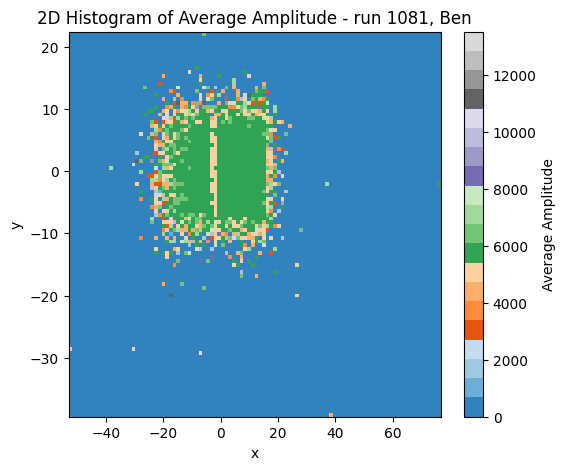

In [229]:
hit_data_scope_1081_filtered = filter_chi2_scope_data(hit_data_scope_1081, 3)
X_gal1 = ak.mean(scope_1081.x_dut, axis=1)
Y_gal1 = ak.mean(scope_1081.y_dut, axis=1)

X_gal = -ak.to_numpy(X_gal1)
Y_gal = ak.to_numpy(Y_gal1)

amp_gal1 = ak.sum(scope_1081.Amplitudes, axis=1)
amp_gal = ak.to_numpy(amp_gal1)

# Define bins
bins = 100

# Histogram of SUM of amplitudes
sum_amp, xedges, yedges = np.histogram2d(X_gal, Y_gal, bins=bins, weights=amp_gal)

# Histogram of COUNTS
counts, _, _ = np.histogram2d(X_gal, Y_gal, bins=[xedges, yedges])

# Avoid division by zero
avg_amp = np.divide(sum_amp, counts, out=np.zeros_like(sum_amp), where=counts > 0)

# Plot
plt.figure(figsize=(6,5))
plt.pcolormesh(xedges, yedges, avg_amp.T, cmap="tab20c")  
plt.colorbar(label="Average Amplitude")
plt.xlim(min(X_gal), max(X_gal))
# plt.xlim(-30, 30)
plt.ylim(min(Y_gal), max(Y_gal))
# plt.ylim(-30, 20)
plt.xlabel("x")
plt.ylabel("y")
plt.title("2D Histogram of Average Amplitude - run 1081, Ben")
plt.show()


In [5]:
def DUT_TELE_merge(run_number):

    # read DUT
    dut = uproot.open(f"TB_FIRE/TB_reco/TB_FIRE_{run_number}_raw_reco.root")
    hits = dut['Hits']
    TLU = hits['TLU_number'].array()
    plane = hits['plane_ID'].array()
    channel = hits['ch_ID'].array()
    amp = hits['amplitude'].array()
    hit_data = ak.zip({"TLU":TLU, "plane":plane, "ch":channel, "amp":amp})

    # sort DUT data to have a single TLU per event

    TLU_data, TLU = rf.ak_groupby_for_scope(TLU,hit_data)
    single_TLU_data = TLU_data[ak.num(TLU_data) == 1]
    single_TLU_data = single_TLU_data[ak.num(single_TLU_data) > 0]
    
    # read tele
    tele = uproot.open(f"TB_FIRE/TB_reco/run_{run_number}_telescope.root")
    tracks = tele['TrackingInfo']['Tracks']
    trigID = tracks['triggerid'].array()
    chi2_ndof = tracks['chi2'].array() / tracks['ndof'].array()
    x = tracks['x_dut'].array()
    y = tracks['y_dut'].array()
    tele_data = ak.zip({"x":x, "y":y, "chired":chi2_ndof})

    # sort TELE data by trigger ID
    trigID_data, trigID = rf.ak_groupby_for_scope(ak.flatten(trigID), tele_data)
    
    # events with 1 triger ID
    single_trigID = trigID_data[ak.num(trigID_data) == 1]

    # events with one telescope track only
    single_track_with_zeros = single_trigID[ak.num(single_trigID.data, axis = 2) == 1]
    single_track_data = single_track_with_zeros[ak.num(single_track_with_zeros) > 0]

    # create mask to get only data with TLU and trigger ID by substraction

    # get indices for events that with matching TLU and TriggerID
    single_TLU_index = single_TLU_data.classes
    single_track_index = single_track_data.classes
    mask_dut = np.isin(single_TLU_index, single_track_index)
    mask_tele = np.isin(single_track_index, single_TLU_index)

    # get the data from dut and tele for corresponding events (apply mask)
    final_dut_data = single_TLU_data[mask_dut]
    final_tele_data = single_track_data[mask_tele]

    # combine DUT and TELE data
    final_dut_hit_data = final_dut_data.data
    final_tele_fit_data = final_tele_data.data
    # return final_dut_hit_data, final_tele_fit_data
    merged = ak.zip({"hits":final_dut_hit_data, "tele":final_tele_fit_data},depth_limit=1)

    return merged


In [6]:
hit_data_scope_1081_tlu = DUT_TELE_merge(1081)